In [2]:
from Heat_atom_Lap import *
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from tqdm import tqdm

In [3]:
def errget(N,s1,s2):
    L,L_gt,s0,D = Setup2(N,s1,s2)
    U,V = Combine([250]*5,5,L,0.001,10)
    Lap, Cond = Learn(U,V)
    err = (error(Lap,L_gt))[2]
    return err

In [4]:
erro5 = []
 
for N in tqdm(range(2,26)):
    r = 0
    for l in tqdm(range(50)):
        s1,s2 = tuple(random.randint(0,100,2))
        r += errget(N,s1,s2)
    erro5.append(r/50)

100%|██████████| 24/24 [1:18:28<00:00, 196.20s/it]


In [5]:
erro5

[0.004403502427959441,
 0.0073617272020740495,
 0.009521383309536063,
 0.012833382913309477,
 0.012853092406637408,
 0.013055535359966942,
 0.017752016838079213,
 0.018118168234417826,
 0.021774208065537,
 0.02347448932112619,
 0.024906905070644234,
 0.02728078353439802,
 0.029167215847157896,
 0.031354262672465,
 0.03385531387955605,
 0.05399497893599471,
 0.12070281470849614,
 0.0954097378650458,
 1.0815841341548544,
 1.1764594468443663,
 1.6856591515712862,
 2.2647511207251227,
 2.4628066096621932,
 2.7356869639810126]

In [ ]:
pkl.dump(array(erro5),open("./Data/EVN_n5.pkl", "wb"))

In [5]:
L = array([[0,	0,	0,	0,	1,	1,	0,	1,	0,	0],
[0,	0,	0,	1,	1,	0,	0,	0,	0,	1],
[0,	0,	0,	0,	0,	0,	1,	1,	0,	1],
[0,	1,	0,	0,	0,	0,	1,	0,	1,	0],
[1,	1,	0,	0,	0,	0,	0,	1,	0,	0],
[1,	0,	0,	0,	0,	0,	0,	0,	1,	1],
[0,	0,	1,	1,	0,	0,	0,	0,	1,	0],
[1,	0,	1,	0,	1,	0,	0,	0,	0,	0],
[0,	0,	0,	1,	0,	1,	1,	0,	0,	0],
[0,	1,	1,	0,	0,	1,	0,	0,	0,	0]])
L = -L
for i in range(10): L[i,i] = 3

12.591247217600593

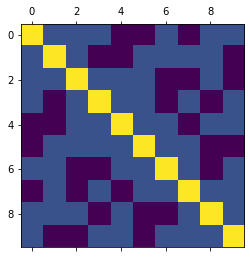

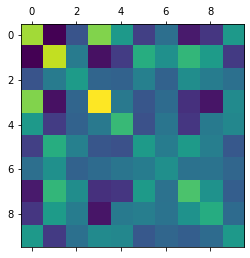

In [11]:
# L,L_gt,s0,D = Setup2(N,s1,s2)
L_gt = L
U,V = Combine([250]*5,5,L,0.001,10)
Lap, Cond = Learn(U,V)
ErrCheck(Lap,L_gt)[2]